In [1]:
import warnings; warnings.filterwarnings("ignore")

In [2]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [3]:
# Load the dataset from the Keras module
data = mnist.load_data()
print(type(data))

<class 'tuple'>


In [9]:
# Identify the datatype of the dataset
print(type(data))
print(type(data[0]))
print(type(data[0][0]))

numpy.ndarray

In [6]:
# Data Exploration
(X_train, y_train), (X_test, y_test) = data
print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))
print("\nDigit Segregation in Training Set:")
for i in range(10):
    print(i,": ", y_train[y_train == i].shape[0])
print("\nDigit Segregation in Test Set:")
for i in range(10):
    print(i,": ", y_test[y_test == i].shape[0])

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

Digit Segregation in Training Set:
0 :  5923
1 :  6742
2 :  5958
3 :  6131
4 :  5842
5 :  5421
6 :  5918
7 :  6265
8 :  5851
9 :  5949

Digit Segregation in Test Set:
0 :  980
1 :  1135
2 :  1032
3 :  1010
4 :  982
5 :  892
6 :  958
7 :  1028
8 :  974
9 :  1009


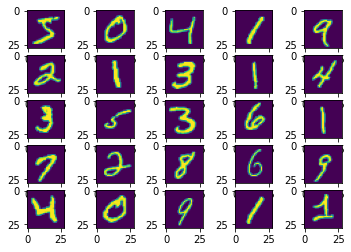

In [6]:
# Plot first few images
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [7]:
# Change Shape
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype("float32")
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype("float32")
print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


In [8]:
# Downscaling the data to a range of 0 to 1
X_train = X_train / 255
X_test = X_test / 255

Name: KNN 
Accuracy Score: 0.9684705010297703


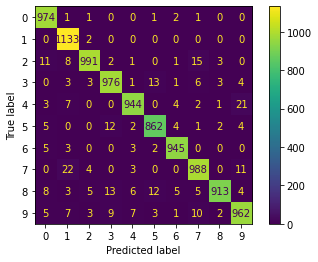

       Digit  Precision    Recall    FScore  Support
0          0   0.963403  0.993878  0.978403    980.0
1          1   0.954507  0.998238  0.975883   1135.0
2          2   0.982161  0.960271  0.971093   1032.0
3          3   0.964427  0.966337  0.965381   1010.0
4          4   0.976215  0.961303  0.968702    982.0
5          5   0.965286  0.966368  0.965826    892.0
6          6   0.981308  0.986430  0.983863    958.0
7          7   0.961089  0.961089  0.961089   1028.0
8          8   0.988095  0.937372  0.962065    974.0
9          9   0.956262  0.953419  0.954839   1009.0
10   Average   0.968800  0.968800  0.968800      NaN
11  Weighted   0.969021  0.968800  0.968747      NaN


In [9]:
# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
scores = balanced_accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Name: KNN", "\nAccuracy Score:", scores)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for i in range(4):
    p1[i].append(p2[i])
    p1[i].append(p3[i])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)